# Some fancy ways of presenting correlation coefficients

In [4]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from matplotlib.collections import EllipseCollection

In [5]:
data=pd.read_csv("data/Chapter04DataSet.csv")
print data.head()

   Insulation  Temperature  Heating_Oil  Num_Occupants  Avg_Age  Home_Size
0           6           74          132              4     23.8          4
1          10           43          263              4     56.7          4
2           3           81          145              2     28.0          6
3           9           50          196              4     45.1          3
4           2           80          131              5     20.8          2


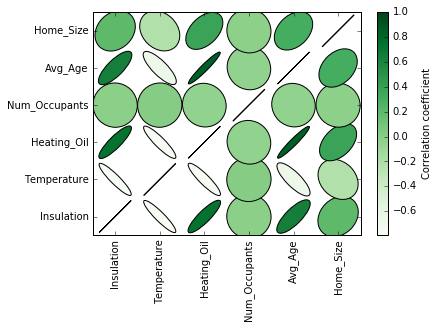

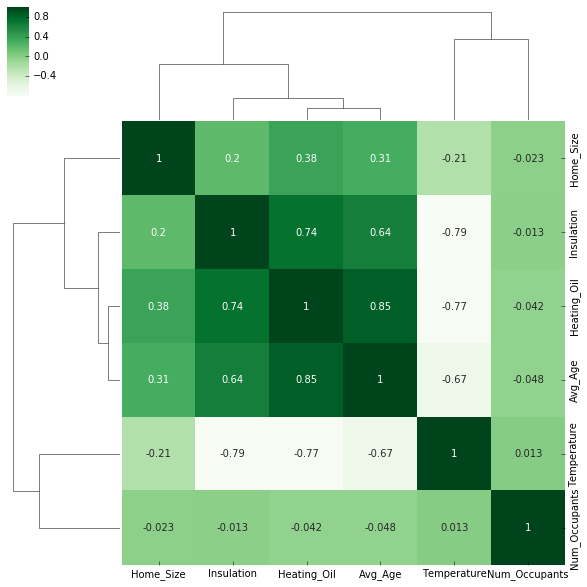

In [6]:
def plot_corr_ellipses(data, ax=None, **kwargs):  
  
    M = np.array(data)  
    if not M.ndim == 2:  
        raise ValueError('data must be a 2D array')  
    if ax is None:  
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})  
        ax.set_xlim(-0.5, M.shape[1] - 0.5)  
        ax.set_ylim(-0.5, M.shape[0] - 0.5)  
  
    # xy locations of each ellipse center  
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T  
  
    # set the relative sizes of the major/minor axes according to the strength of  
    # the positive/negative correlation  
    w = np.ones_like(M).ravel()  
    h = 1 - np.abs(M).ravel()  
    a = 45 * np.sign(M).ravel()  
  
    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,  
                           transOffset=ax.transData, array=M.ravel(), **kwargs)  
    ax.add_collection(ec)  
  
    # if data is a DataFrame, use the row/column names as tick labels  
    if isinstance(data, pd.DataFrame):  
        ax.set_xticks(np.arange(M.shape[1]))  
        ax.set_xticklabels(data.columns, rotation=90)  
        ax.set_yticks(np.arange(M.shape[0]))  
        ax.set_yticklabels(data.index)  
  
    return ec  
  
fig, ax = plt.subplots(1, 1)  
m = plot_corr_ellipses(data.corr(), ax=ax, cmap='Greens')  
cb = fig.colorbar(m)  
cb.set_label('Correlation coefficient')  
ax.margins(0.1)  
current_fig = plt.gcf()    
current_fig.savefig('my_0.pdf', bbox_inches='tight')    
  
sns.clustermap(data=data.corr(), annot=True, cmap='Greens')

In the module "Data Analytics using R", we will learn R ways of presenting correlation coefficients. See some examples from:
    
- http://jamesmarquezportfolio.com/correlation_matrices_in_r.html 
- https://rstudio-pubs-static.s3.amazonaws.com/240657_5157ff98e8204c358b2118fa69162e18.html

# References
- http://blog.csdn.net/vernice/article/details/53947278 (reproduced from here)